Load the dataset into a dataframe and check some initial information about cyclists and races

In [1]:
import seaborn

In [2]:
import pandas

cyclists_ds = pandas.read_csv('dataset/cyclists.csv')
races_ds = pandas.read_csv('dataset/races.csv')

In [3]:
cyclists_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


Almost half of the cyclists don't have weight/height indicated.

In [4]:
races_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

Uci points are assigned to less than half of the performances.
Average temperature is almost nonexistent in the dataset. 

In [5]:
races_ds.groupby(['cyclist','cyclist_age']).size()

cyclist           cyclist_age
aad-van-den-hoek  24.0            1
                  25.0            1
                  26.0            1
                  27.0           24
                  28.0            1
                                 ..
zoran-klemencic   24.0           14
                  25.0           14
                  26.0           34
                  28.0           14
zsolt-der         27.0            1
Length: 29871, dtype: int64

Looks like the age of the cyclists is calculated at "race time"

In [6]:
cyclists_ds.dtypes

_url            object
name            object
birth_year     float64
weight         float64
height         float64
nationality     object
dtype: object

In [7]:
races_ds.dtypes

_url                    object
name                    object
points                 float64
uci_points             float64
length                 float64
climb_total            float64
profile                float64
startlist_quality        int64
average_temperature    float64
date                    object
position                 int64
cyclist                 object
cyclist_age            float64
is_tarmac                 bool
is_cobbled                bool
is_gravel                 bool
cyclist_team            object
delta                  float64
dtype: object

In [8]:
cyclists_ds.describe().drop('count')

,birth_year,weight,height
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


The mean weight is higher than the average World weight (62.0 kg). It is closer to Europe and Latin America averages (70.8 kg and 67.9 kg). (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3408371/)

In [9]:
cyclists_ds.groupby(['nationality']).size().sort_values(ascending=False)

nationality
Italy                 1029
Spain                  872
Belgium                869
France                 741
Netherlands            380
                      ... 
Hongkong                 1
Greece                   1
Dominican Republic       1
Azerbaijan               1
Zimbabwe                 1
Length: 72, dtype: int64

Who would have thought! Surely, it must be a popular sport in Europe.
Let's check some distributions regarding the races

/home/yuri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yuri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


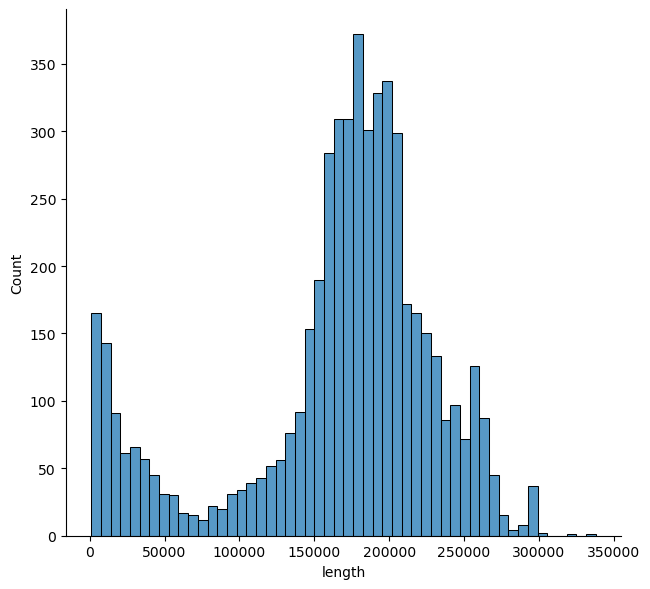

In [10]:
aggregated_stages = races_ds.groupby('_url').agg({'length':'first'}).reset_index()

seaborn.displot(aggregated_stages,
                x='length',
                kind='hist',
                aspect=1.1,
                height=6
)

Some races are set to be of length 0... we'll have to impute some data.

/home/yuri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yuri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


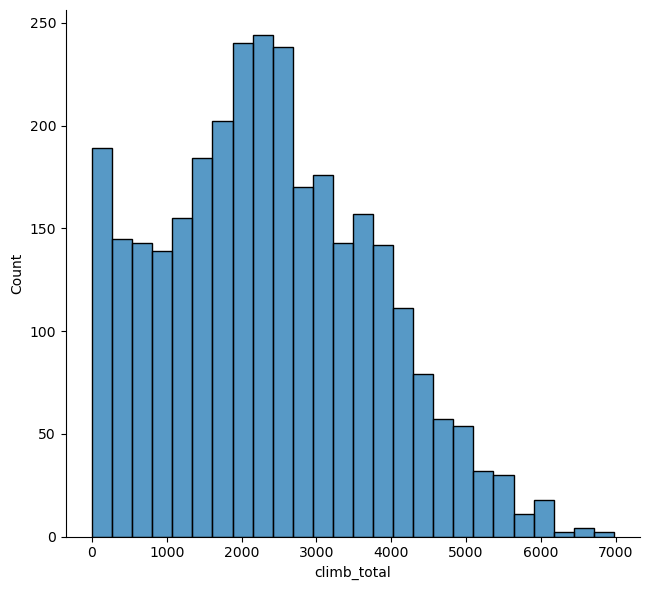

In [11]:
aggregated_stages = races_ds.groupby('_url').agg({'climb_total':'first'}).reset_index()

seaborn.displot(aggregated_stages,
                x='climb_total',
                kind='hist',
                aspect=1.1,
                height=6
)

In [12]:
from typing import Dict

def correlations(dataset: pandas.DataFrame) -> pandas.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pandas.concat(correlations_dictionary.values())

    return correlations_matrix

In [13]:
from typing import Tuple, Dict, Any
from sklearn.preprocessing import StandardScaler

def __transform_single_features(dataset: pandas.DataFrame, transformation: str) -> Tuple[
    pandas.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pandas.DataFrame) -> Tuple[pandas.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")


def drop_boolean(dataset: pandas.DataFrame) -> pandas.DataFrame:
    return dataset.select_dtypes(exclude="bool")

In [14]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(races_ds)
corr = correlations(normalized_dataset)
corr

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta,correlation_type
points,1.000000,0.486830,0.283637,0.044915,-0.097831,0.387373,0.153829,0.011531,-0.005476,0.068592,kendall
uci_points,0.486830,1.000000,0.098587,0.046858,-0.000465,0.007000,0.066502,-0.023719,0.007526,0.070373,kendall
length,0.283637,0.098587,1.000000,0.285099,0.017441,0.064082,-0.095313,-0.015373,-0.002381,0.029217,kendall
climb_total,0.044915,0.046858,0.285099,1.000000,0.578126,0.009066,-0.079710,-0.023858,0.005533,0.356194,kendall
profile,-0.097831,-0.000465,0.017441,0.578126,1.000000,-0.092412,-0.020977,-0.018424,0.005635,0.420183,kendall
startlist_quality,0.387373,0.007000,0.064082,0.009066,-0.092412,1.000000,0.218390,0.097527,0.033589,0.032290,kendall
average_temperature,0.153829,0.066502,-0.095313,-0.079710,-0.020977,0.218390,1.000000,0.015593,0.033887,0.023630,kendall
position,0.011531,-0.023719,-0.015373,-0.023858,-0.018424,0.097527,0.015593,1.000000,0.006378,0.296542,kendall
cyclist_age,-0.005476,0.007526,-0.002381,0.005533,0.005635,0.033589,0.033887,0.006378,1.000000,-0.002685,kendall
delta,0.068592,0.070373,0.029217,0.356194,0.420183,0.032290,0.023630,0.296542,-0.002685,1.000000,kendall


/home/yuri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


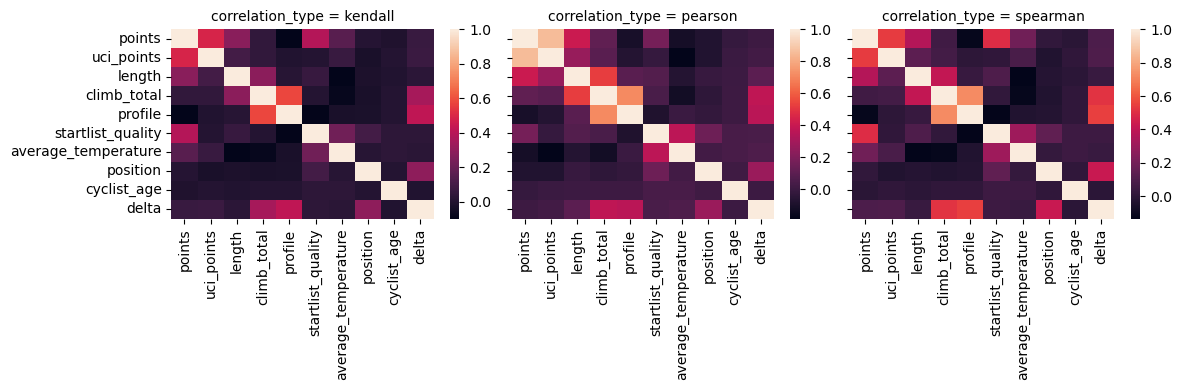

In [16]:
g = seaborn.FacetGrid(corr, col="correlation_type", col_wrap=3, height=4)
g.map_dataframe(lambda data, color: seaborn.heatmap(data[data.columns[:-1]]))